In [1]:
from google.colab import drive # Importing Google Colab module for using Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # Importing libraries for data manipulation
import pandas as pd # Importing libraries for data manipulation
import xgboost as xgb # Importing XGBoost for gradient boosting
from sklearn.metrics import confusion_matrix # Importing Scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split # Importing Scikit-learn modules for machine learning tasks
import matplotlib.pyplot as plt # Importing libraries for data visualization
import seaborn as sns # Importing libraries for data visualization

In [3]:
# Define your calculate_log_loss function
def calculate_log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Malik/pre-processed_data_modeling.csv')
data.head()

,C21,day_of_week,C14,site_domain,device_model,part_of_day,site_id,app_id,device_ip,C19,C15,site_category,device_id,C16,C20,click
0,15,3,377,6124,4355,1,2546,8998,2147212,1319,320,6,1918736,50,-1,1
1,23,3,19950,746,4485,4,1856,8433,2284067,167,320,24,1918736,50,100079,0
2,20,2,787,6124,7947,3,2546,2834,431146,169,320,6,1918736,50,100094,0
3,156,1,17877,6124,1819,1,2546,3745,2339535,47,320,6,1918736,50,-1,1
4,221,2,23202,7495,4485,1,594,8433,4336748,163,320,2,1918736,50,100084,0


In [5]:

# Assuming 'data' is your DataFrame and 'target' is the name of the target variable
X = data.drop('click', axis=1)  # Features
Y = data['click']  # Target variable

In [6]:
X.shape

(10000000, 15)

In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Log Loss: 0.5713599920272827


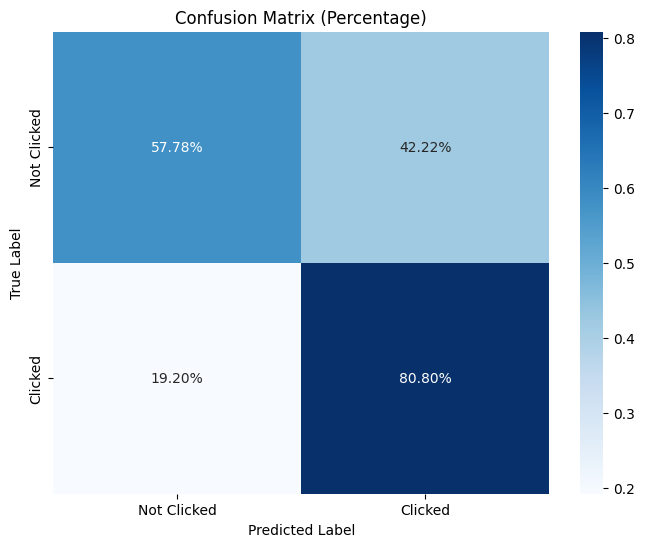

In [8]:
# Initialize an XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=20,
    learning_rate=0.1,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Fit the model to the training set
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Assuming a binary classification; adjust if necessary

# Calculate log loss
log_loss = calculate_log_loss(y_test, y_pred_prob)
print(f'Log Loss: {log_loss}')

# Predict class labels based on a threshold
threshold = 0.5
y_pred_class = (y_pred_prob > threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Normalize the confusion matrix to show percentages
cm_percentage = cm / cm.sum(axis=1).reshape(-1, 1)

# Plotting the confusion matrix in percentage
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [9]:
## Predicting using the best model
test = pd.read_csv('/content/drive/MyDrive/Malik/test_label_encoded.csv')

In [10]:
data = pd.read_csv("/content/drive/MyDrive/AI ML Project/ProjectSubmission-TeamX.csv", dtype={"column1": str, "column2": float})

In [11]:
test = test.drop('hour', axis=1)

In [25]:
len(test.columns)

24

In [13]:
selected_columns = [
    'device_ip', 'device_model', 'C14', 'device_id', 'day_of_week', 'C20',
    'part_of_day', 'site_id', 'site_domain', 'C21', 'app_id', 'C16',
    'site_category', 'C19', 'C15' # 'C17' is excluded since it is too correlated to column  C14
]

test_selected = test[selected_columns]

In [29]:
X_train.columns

Index(['C21', 'day_of_week', 'C14', 'site_domain', 'device_model',
       'part_of_day', 'site_id', 'app_id', 'device_ip', 'C19', 'C15',
       'site_category', 'device_id', 'C16', 'C20'],
      dtype='object')

In [31]:
# Reordering the columns of test_selected to match the order in X_train
test_selected = test_selected[X_train.columns]

In [33]:
# test_selected

In [34]:
data['P(click)'] = model.predict_proba(test_selected)

In [37]:
data

,id,P(click)
0,3295858251275419735,0.817290
1,12281702837842634283,0.928968
2,4638380339534007785,0.917126
3,17039804736879076347,0.398978
4,5753064066292192109,0.472236
...,...,...
13015336,13925888664291307582,0.666071
13015337,16609686573956964319,0.268713
13015338,4549134116722204000,0.333886
13015339,2114008866308662546,0.761223


In [35]:
data.iloc[:, 1] = data.iloc[:, 1].round(10).apply(lambda x: format(x, 'f'))
# Write out the data in the correct format
data.to_csv("/content/drive/MyDrive/Malik/ProjectSubmission-Team_malik-Output_submission.csv", index=False, float_format='%.10f')
